# Analisis de Marketing
***

**¿Cómo influyen los dias de la semana en la efectividad de nuestras campañas de  marketing y qué dias  deberian ser priorizados para maximizar el éxito de nuestras estrategias?**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

df = pd.read_csv("../Data/df_250526.csv")
print(df.head())
print(df.shape)
print(df['deposit'].unique())
print(df['contact'].unique())

custom_palette = ["#2CCED1", "#5F6F81", "#AABBC8", "#DCE3EA", "#2E2F36"]

   Unnamed: 0  id  age         job  marital  education  default  balance  \
0           0   1   59      admin.  married  secondary    False     2343   
1           1   2   59      admin.  married  secondary    False     2343   
2           2   3   56      admin.  married  secondary    False       45   
3           3   4   41  technician  married  secondary    False     1270   
4           4   5   55    services  married  secondary    False     2476   

   housing   loan  contact  day month  duration  campaign  pdays  previous  \
0     True  False  unknown    5   May      1042         1     -1         0   
1     True  False  unknown    5   May      1042         1     -1         0   
2    False  False  unknown    5   May      1467         1     -1         0   
3     True  False  unknown    5   May      1389         1     -1         0   
4     True  False  unknown    5   May       579         1     -1         0   

  poutcome  deposit        date  
0  unknown     True  2024-05-05  
1  unk

**Tabla de dias de la semana, tasa de conbersion y media de edad**<br>
*Extraemos dia del mes y de la semana y damos nombre a los dias de la semana*

In [ ]:

df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["monthday"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.day_name()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_stats = df.groupby("day_of_week")[["deposit", "age"]].agg({
    "deposit": "mean",
    "age": "mean"
}).rename(columns={
    "deposit": "tasa_conversion",
    "age": "edad_media"
}).round(2)

weekday_stats = weekday_stats.reindex(ordered_days)
weekday_stats


,tasa_conversion,edad_media
day_of_week,,
Monday,0.46,41.03
Tuesday,0.47,40.69
Wednesday,0.41,41.40
Thursday,0.33,40.57
Friday,0.69,42.52
Saturday,0.66,40.46
Sunday,0.49,42.21


### Interpretación:<br>
***
Viernes y sábado destacan con tasas muy altas de conversión (69% y 66%), siendo los días óptimos para lanzar campañas.<br>
Jueves es el peor día de la semana para la conversión (33%).<br>
Las edades medias no muestran grandes variaciones, pero sí se aprecia una ligera subida en viernes y domingo.<br>


**Recomendaciones**:<br> <ul>
<li>Priorizar viernes y sábado para las campañas intensivas.<br>
<li>Evitar jueves, salvo en segmentos muy específicos.z<br>
<li>Considerar hacer pruebas A/B en lunes y martes, que muestran tasas estables pero mejorables. </ul>

### Test Chi-Cuadrado para comprobar si el día de la semana influye en la conversión

In [18]:

tabla_chi = pd.crosstab(df['day_of_week'], df['deposit'])

chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("Tabla de contingencia:\n", tabla_chi)
print(f"\nChi² = {chi2:.2f}, p-valor = {p:.4f}")


Tabla de contingencia:
 deposit      False  True 
day_of_week              
Friday         306    694
Monday        2802   2389
Saturday       979   1878
Sunday        2665   2554
Thursday      1714    837
Tuesday       2815   2496
Wednesday     2400   1651

Chi² = 876.21, p-valor = 0.0000


Hay evidencia significativade que el dia de la semana influye en el comportamiento de los clientes.


***
**Tasa de conversión por dia de la semana- Gráfico 1-**

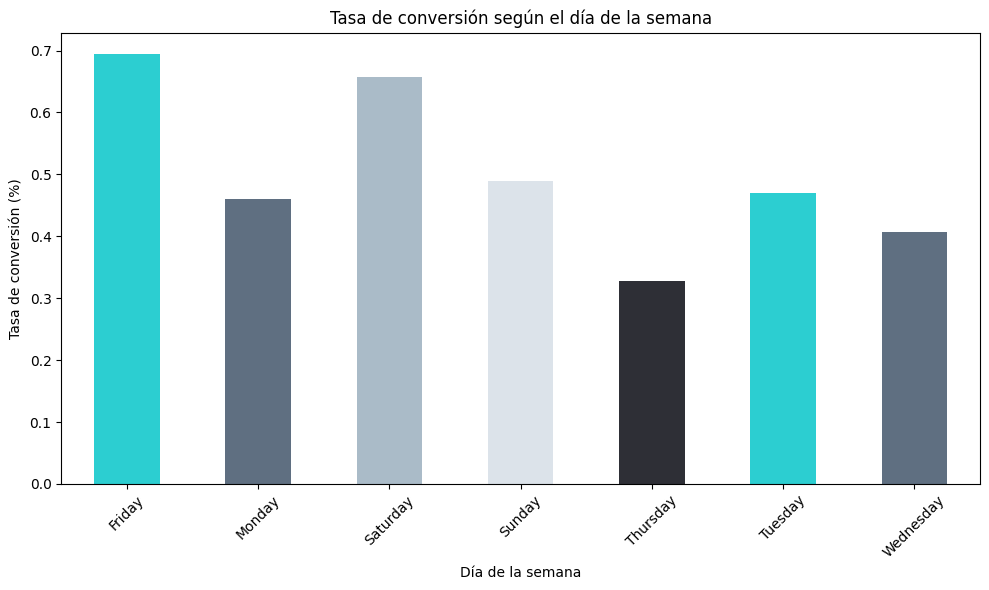

In [19]:
conversion_by_weekday = df.groupby("day_of_week")["deposit"].mean().sort_index()
plt.figure(figsize=(10, 6))
conversion_by_weekday.plot(kind='bar', color=custom_palette[:7])
plt.title('Tasa de conversión según el día de la semana')
plt.ylabel('Tasa de conversión (%)')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Interpretación:<br>
***
Viernes y sábado destacan con tasas muy altas de conversión (69% y 66%), siendo los días óptimos para lanzar campañas. <br>
Puede estar relacionado con una mayor disponibilidad del usuario, menor carga laboral o predisposición positiva al final de semana.<br>
Jueves es el peor día de la semana para la conversión (33%).<br>
En la zona media tenemos domingo, lunes y martes.

**Recomendaciones**:<br> <ul>
<li>Priorizar viernes y sábado<br>
<li>Evitar campañas prioritarias en jueves, pues presentan el peor rendimiento.<br>
<li>Comenzar la semana (lunes-martes) con contactos suaves o pruebas A/B.<br>
<li>Reservar viernes-sábado para cerrar ventas o reforzar campañas.<br>

***
**Tasa de conversión por dia de la semana- Gráfico 2-**

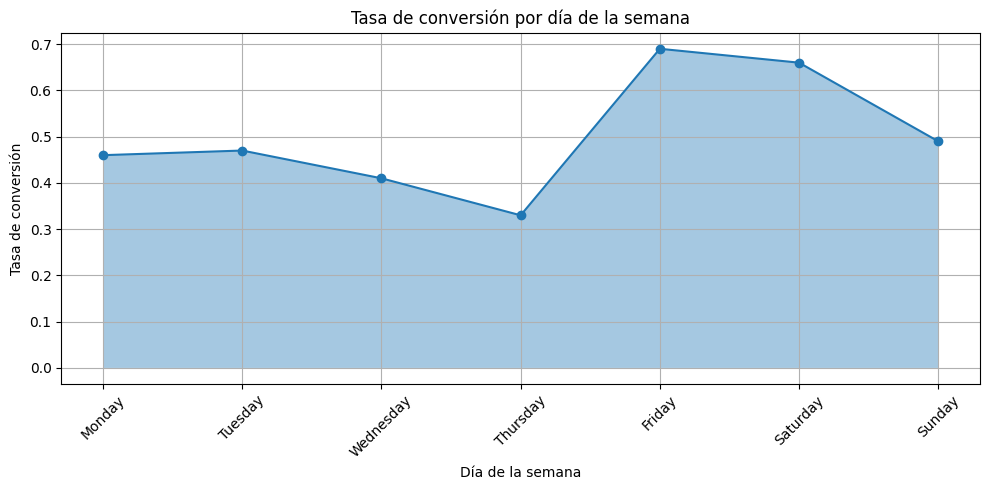

In [15]:
plt.figure(figsize=(10, 5))
plt.fill_between(weekday_stats.index, weekday_stats["tasa_conversion"], alpha=0.4)
plt.plot(weekday_stats.index, weekday_stats["tasa_conversion"], marker="o")
plt.title("Tasa de conversión por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Tasa de conversión")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


***
**Tasa de conversión por dia del mesa- Gráfico 1-**

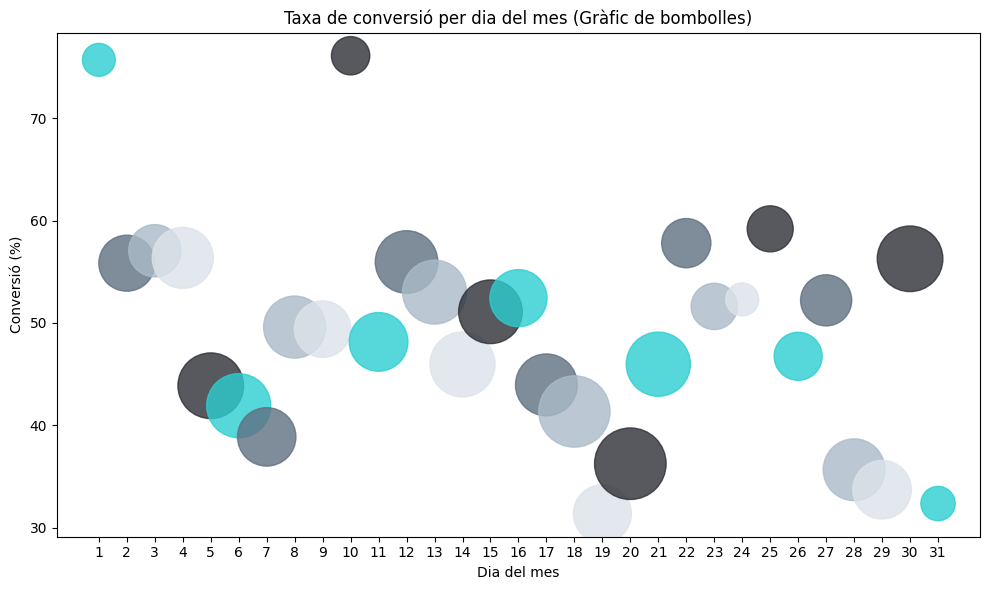

In [16]:


day_conversion = df.groupby('day')['deposit'].mean() * 100
day_counts = df['day'].value_counts().sort_index()

colors = [custom_palette[i % len(custom_palette)] for i in range(len(day_conversion))]

plt.figure(figsize=(10, 6))
plt.scatter(
    day_conversion.index, 
    day_conversion.values, 
    s=day_counts.values * 2, 
    alpha=0.8, 
    color=colors  # Aquí usamos tu paleta
)

plt.title('Taxa de conversió per dia del mes (Gràfic de bombolles)')
plt.xlabel('Dia del mes')
plt.ylabel('Conversió (%)')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()



### Interpretación del gráfico de burbujas
Este gráfico de burbujas muestra la relación entre el número de contactos realizados y la tasa de conversión de un conjunto de datos. <br>
Cada burbuja representa un día específico, y su tamaño y color reflejan la tasa de conversión y el número de contactos realizados ese día.<br>

Los días con mayor tasa de conversión son el 1 y el 10, con una tasa de conversión cercana al 75%. <br>
Son burbujas pequeñas pero de color solido lo que indica pocas llamadas y alta conversión.<br>
Posiblemente, al ser los días habituales de cobro de salarios, con lo que son días dados a la planificación y gestión economica. <br><br>
Los días con menor tasa de conversión son el 19, 20, 29, 30 y 31, con tasas de conversión por debajo del 40%. <br>
Además, muchos de ellos tienen burbujas grandes, es decir, más contactos pero menos efectividad.

**Recomendaciones** <ul>
<li>Aumentar la intensidad de las campañas en los días con mayor tasa de conversión.<br>
<li>Iniciar mes con ofertas agresivas.<br>
<li>Mitad de mes con seguimiento o nurturing.<br>
<li>Cierre del mes reservado a leads muy cualificados.</ul>



***
**Tasa de conversión por dia del mes- Gráfico 2 y tabla-**

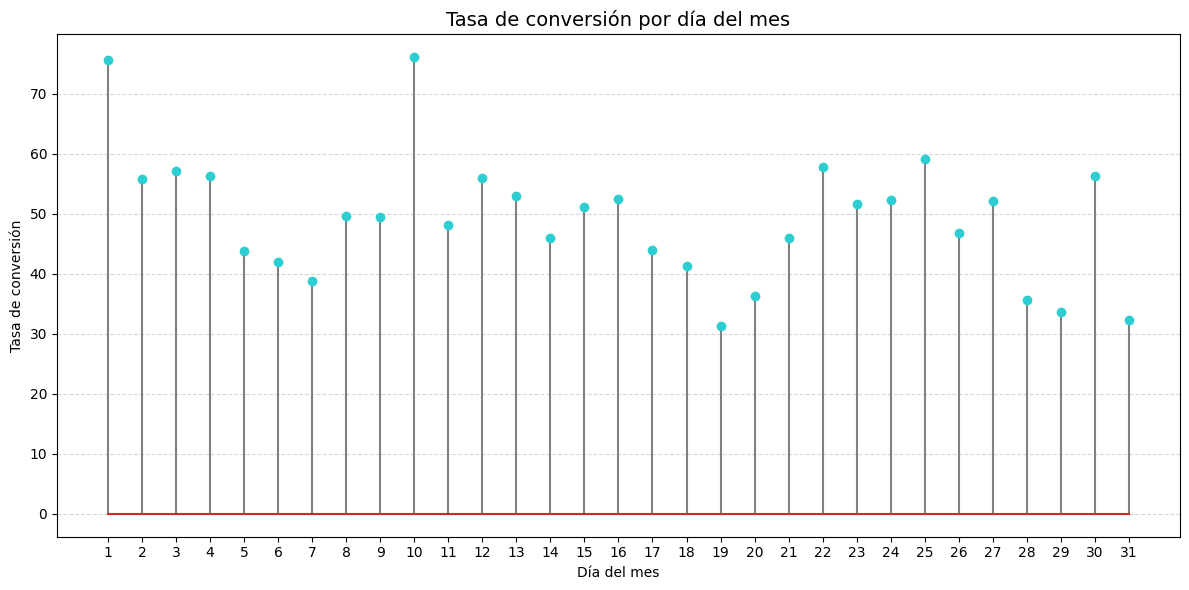

,tasa_conversion,edad_media,n_contactos
monthday,,,
1,0.76,41.62,280
2,0.56,41.07,813
3,0.57,41.10,708
4,0.56,39.71,967
5,0.44,41.80,1117
6,0.42,41.14,1064
7,0.39,41.26,885
8,0.50,40.02,1000
9,0.49,41.73,828


In [17]:

plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(day_conversion.index, day_conversion.values)


plt.setp(markerline, marker='o', markersize=6, color='#2CCED1')
plt.setp(stemlines, color='gray')
plt.title("Tasa de conversión por día del mes", fontsize=14)
plt.xlabel("Día del mes")
plt.ylabel("Tasa de conversión")
plt.xticks(day_conversion.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

monthday_stats = df.groupby("monthday")[["deposit", "age"]].agg({
    "deposit": "mean",
    "age": "mean"
}).rename(columns={
    "deposit": "tasa_conversion",
    "age": "edad_media"
})


monthday_stats["n_contactos"] = df.groupby("monthday")["deposit"].count()
monthday_stats = monthday_stats.round(2)
monthday_stats

### Interpretación de la tabla
Día 1 y Día 10: Ambos con una tasa de conversión del 76%, los más altos del mes.<br>
Curiosamente, son fechas comunes de cobro, lo que refuerza la hipótesis de mayor disposición financiera.<br>
Días 25 y 22: También presentan tasas altas: 59% y 58%, y podrían vincularse con pagos adicionales o cobros tardíos del mes anterior.<br>
Día 31: Tasa de conversión del 32%, la más baja. Posible fatiga financiera o menor interés en final de mes.<br>
Días 19, 20 y 28: Entre 31% y 36%, mostrando una tendencia baja a partir de la tercera semana.<br>
**Relación con el volumen de contactos**<br>
La cantidad de contactos no siempre está correlacionada con la conversión. Ejemplo:<br>
Día 5: 1117 contactos, pero solo 44% de conversión.<br>
Día 10: 381 contactos, pero 76% de conversión.<br>
Esto sugiere que calidad > cantidad de contactos. Vale la pena priorizar días más efectivos, aunque haya menos llamadas.<br>
**Relación con la edad**<br>
Aunque no hay una tendencia lineal clara, los días con mayores tasas de conversión (día 1 y 10) tienen edades medias en torno a los 41-42 años, que parece el grupo más receptivo.<br>

**Recomendaciones** <ul>
<li>Enfocar los esfuerzos de captación en días 1, 10, 22 y 25.<br>
<li>Evitar campañas masivas en los días 19, 20, 28 y 31.<br>
<li>Redirigir llamadas a días de mayor conversión aunque haya menos registros.<br>
<li>Analizar si la edad, canal de contacto u otras variables influyen en los días de mayor conversión.</ul>